In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import scipy as sp
import scipy.interpolate
import pandas as pd
import rwthcolors
import eurographics_style
import glob
import re

In [2]:
output_dir = '/local/born/layout-embedding-output'
optimization_pipeline_output_dir = output_dir + '/optimization_timeline'

In [3]:
ub_fns = glob.glob(optimization_pipeline_output_dir + '/*_upper_bound.csv')

runs = []

for fn in ub_fns:
    m = re.search('(\d+)_upper_bound\.csv', fn)
    seed = int(m.group(1))
    data = pd.read_csv(fn)
    num_events = len(data)
    run = {'seed': seed, 'num_events': num_events}
    runs.append(run)

runs = sorted(runs, key=lambda r: r['num_events'], reverse=True)
for run in runs[0:20]:
    seed = run['seed']
    num_events = run['num_events']
    print(f'Seed {seed}: {num_events} upper bound events')

Seed 869: 7 upper bound events
Seed 867: 6 upper bound events
Seed 740: 6 upper bound events
Seed 721: 6 upper bound events
Seed 594: 5 upper bound events
Seed 2: 5 upper bound events
Seed 850: 5 upper bound events
Seed 436: 5 upper bound events
Seed 461: 5 upper bound events
Seed 747: 5 upper bound events
Seed 601: 5 upper bound events
Seed 681: 5 upper bound events
Seed 463: 5 upper bound events
Seed 660: 5 upper bound events
Seed 595: 5 upper bound events
Seed 433: 5 upper bound events
Seed 795: 5 upper bound events
Seed 407: 5 upper bound events
Seed 203: 5 upper bound events
Seed 912: 5 upper bound events


In [20]:
best_seed = runs[0]['seed']
print(f'Best Seed: {best_seed}')

lb_fn = optimization_pipeline_output_dir + f'/{best_seed}_lower_bound.csv'
ub_fn = optimization_pipeline_output_dir + f'/{best_seed}_upper_bound.csv'

lb_data = pd.read_csv(lb_fn)
ub_data = pd.read_csv(ub_fn)

Best Seed: 869


In [29]:
def plot_run(lb_data, ub_data):
    min_t = min(lb_data['t'].min(), ub_data['t'].min())
    max_t = max(lb_data['t'].max(), ub_data['t'].max())
    
    lb_data = lb_data[lb_data['lower_bound'] > 0.0].copy()
    lb_data.iloc[-1, lb_data.columns.get_loc('lower_bound')] = ub_data.iloc[-1, ub_data.columns.get_loc('upper_bound')]
    
    lb_t = lb_data['t']
    ub_t = ub_data['t']
    lb = lb_data['lower_bound']
    ub = ub_data['upper_bound']
    
    t_resampled = np.sort(np.concatenate((lb_t, ub_t)))

    lb_interp = sp.interpolate.interp1d(lb_t, lb, kind='previous', fill_value='extrapolate')
    lb_resampled = lb_interp(t_resampled)

    ub_interp = sp.interpolate.interp1d(ub_t, ub, kind='previous', fill_value='extrapolate')
    ub_resampled = ub_interp(t_resampled)
    
    lb_resampled = np.minimum(lb_resampled, ub_resampled)
    lb = np.minimum(lb, ub_interp(lb_t))
    
    plt.figure()
    plt.xlabel('Time')

    plt.fill_between(t_resampled, lb_resampled, ub_resampled, color='rwth:blue10', step='post')

    plt.step(t_resampled, lb_resampled, label='Lower Bound', c='rwth:blue50', where='post')
    plt.step(t_resampled, ub_resampled, label='Upper Bound', c='rwth:blue', where='post')

    point_size = 10.0
    #plt.scatter(lb_t, lb, c='rwth:blue50', s=point_size)
    plt.scatter(ub_t, ub, c='rwth:blue', s=point_size)
    #plt.ylim((10, 16))

    plt.legend()
    plt.savefig('/home/born/Downloads/optimization_timeline.pdf')

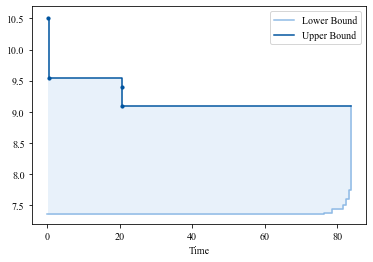

In [30]:
plot_run(lb_data, ub_data)

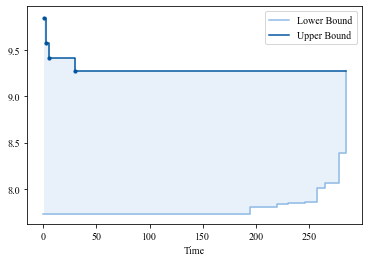

In [32]:
seed = 2
lb_fn = optimization_pipeline_output_dir + f'/{seed}_lower_bound.csv'
ub_fn = optimization_pipeline_output_dir + f'/{seed}_upper_bound.csv'
lb_data = pd.read_csv(lb_fn)
ub_data = pd.read_csv(ub_fn)
plot_run(lb_data, ub_data)